### AI-07: Cross-validation of linear regression  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

#### Read CSV file  

In [2]:
csv_in = 'reg100x50.csv'
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
display(df.head())

(100, 51)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,0.4,-0.3,2.4,-0.3,0.1,1.6,-0.9,-0.6,0.2,-0.3,...,1.1,-0.4,-0.8,0.3,2.0,-0.5,-1.3,0.1,0.5,1.4
1,0.7,0.1,-0.4,0.0,-0.1,0.8,-0.6,-0.0,-0.1,-0.1,...,0.2,-0.1,-1.1,-0.1,-1.3,0.7,0.1,0.6,1.0,15.2
2,1.4,0.2,-1.3,-0.7,-0.6,1.2,-0.1,2.3,0.7,0.1,...,1.2,-1.3,0.8,0.2,0.1,0.5,-0.6,0.8,0.1,10.4
3,-1.4,0.9,-0.2,-0.6,-0.2,2.1,0.3,0.7,0.8,1.0,...,-0.7,0.2,-0.3,-0.5,-0.1,1.8,-0.8,-0.3,1.4,1.6
4,0.8,0.2,-1.8,0.6,0.5,1.0,-0.8,2.5,-1.2,0.7,...,0.5,-1.0,0.6,-1.7,-0.8,-0.9,0.5,0.7,-1.3,-8.5


#### Estimation of generalization performance using 5-fold cross validation  

##### Firstly, prepare for data with 25 variables ...  

In [3]:
Xh = df.loc[:, 'x25':'x49']  # explanatory variables
yh = df['y']  # objective variable
print(Xh.shape, yh.shape)

(100, 25) (100,)


##### Then execute regression calculation within CV loop  

In [4]:
skf = KFold(n_splits=4)
mae_all = []
pred_all = pd.Series([])
for train, test in skf.split(Xh, yh):
    print(train.shape, test.shape)  # debug
    Xh_train_c = sm.add_constant(Xh.loc[train])
    model = sm.OLS(yh[train], Xh_train_c)
    results = model.fit()
    Xh_test_c = sm.add_constant(Xh.loc[test])
    yh_test_pred = results.predict(Xh_test_c)
    mae = mean_absolute_error(yh_test_pred,yh[test])
    mae_all.append(mae)
    pred_all = pd.concat([pred_all,yh_test_pred])

(75,) (25,)
(75,) (25,)
(75,) (25,)
(75,) (25,)
<ipython-input-4-6b80f1908018>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pred_all = pd.Series([])


In [5]:
print(np.mean(mae_all), mae_all)
# or
#print(mean_squared_error(pred_all,yh))

4.855702790390043 [3.3552268572216697, 5.039189356330483, 5.74792672659645, 5.28046822141157]


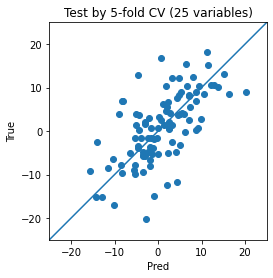

In [6]:
#print(pred_all.shape, yh.shape)
plt.title('Test by 5-fold CV (25 variables)')
plt.xlabel('Pred')
plt.ylabel('True')
plt.scatter(pred_all, yh)
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.plot([-25,25],[-25,25])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()